In [ ]:
import sqlite3
import pandas as pd
import json
import string
import numpy as np

In [4]:
db_name = 'Sheng.db'

In [5]:
conn = sqlite3.connect(db_name)

# age, #likes, #posts

In [24]:
df = pd.read_sql_query('select birth_date,name,gender,colleges from facebook_users',conn)

In [25]:
df = df[pd.notnull(df['birth_date'])]

In [26]:
df = df[df.birth_date.str.contains(',')]

In [27]:
df['year'] = pd.DatetimeIndex(df['birth_date']).year

In [28]:
df['age'] = pd.to_datetime('today').year - df['year']

In [29]:
user_id = df.id.tolist()

In [30]:
df2 = pd.read_sql_query('select * from feeds',conn)

In [31]:
df2 = df2[df2['user_id'].isin(user_id)]

In [32]:
df2 = df2[['user_id','id']].groupby('user_id').count()

In [33]:
df2 = df2.rename(columns = {'id':'num_posts'})

In [34]:
df3 = pd.read_sql_query('select * from likes_list',conn)

In [35]:
df3 = df3[df3['user_id'].isin(user_id)]

In [36]:
df3 = df3.groupby('user_id').count()

In [37]:
df3 = df3.rename(columns = {'page_id':'num_likes'})

In [38]:
df4 = pd.merge(pd.merge(df, df2, how='inner', left_on=['id'], right_on=['user_id']),df3,how='inner', left_on=['id'], right_on=['user_id'])

In [19]:
df4

,id,birth_date,name,colleges,year,age,num_posts,num_likes
0,35,"February 19, 1994",Rui Gao,Female,1994,24,23,2
1,36,"March 9, 1994",Feiyu Lu,Male,1994,24,26,247
2,37,"February 8, 1994",Shuang Jin,Female,1994,24,41,161
3,38,"March 17, 1994",Licheng Dong,Male,1994,24,57,36
4,39,"March 2, 1994",Joy Xintong Zhou,Female,1994,24,7,17
5,40,"July 17, 1995",Yan Chen,Female,1995,23,7,222
6,41,"February 11, 1994",Han Xu,Female,1994,24,19,5
7,43,"September 19, 1994",Hanchen Zhao,Male,1994,24,7,9
8,44,"May 21, 1994",Ruikai Hou,Female,1994,24,154,3
9,45,"April 13, 1994",Haici Tan,Female,1994,24,8,4


In [298]:
df4 = df4[['id','name','birth_date','gender','age','num_posts','num_likes']]

In [299]:
df4

,id,name,birth_date,gender,age,num_posts,num_likes
0,35,Rui Gao,"February 19, 1994",Female,24,23,2
1,36,Feiyu Lu,"March 9, 1994",Male,24,26,247
2,37,Shuang Jin,"February 8, 1994",Female,24,41,161
3,38,Licheng Dong,"March 17, 1994",Male,24,57,36
4,39,Joy Xintong Zhou,"March 2, 1994",Female,24,7,17
5,40,Yan Chen,"July 17, 1995",Female,23,7,222
6,41,Han Xu,"February 11, 1994",Female,24,19,5
7,43,Hanchen Zhao,"September 19, 1994",Male,24,7,9
8,44,Ruikai Hou,"May 21, 1994",Female,24,154,3
9,45,Haici Tan,"April 13, 1994",Female,24,8,4


In [300]:
#df5 = df4.copy()

In [301]:
df5 = pd.concat([df5,df4],ignore_index=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [303]:
df5 = df5.drop(['id'],axis=1)

In [304]:
df5.to_csv('age_frequency_data.csv')

In [305]:
df5

,age,birth_date,gender,name,num_likes,num_posts,year
0,33,"May 12, 1985",Male,Yi Wang,56,50,NaN
1,29,"May 20, 1989",Female,Xin Ji,6,25,NaN
2,31,"January 18, 1987",Male,Kevin Hong,36,22,NaN
3,44,"February 28, 1974",Male,Liwen Chen,132,711,NaN
4,30,"October 16, 1988",Female,Tingting Nian,105,13,NaN
5,24,"January 14, 1994",Female,Peiwen Tang,3,23,NaN
6,24,"September 26, 1994",Female,Yi Gao,47,24,NaN
7,24,"June 19, 1994",Female,紫薇胡,5,25,NaN
8,24,"March 4, 1994",Female,Lusha Zhang,21,22,NaN
9,24,"March 13, 1994",Female,Nora Yueqi Huang,12,23,NaN


# network graph

In [229]:
import networkx as nx
#import visJS2jupyter.visJS_module
import matplotlib.pyplot as plt
from colour import Color


In [127]:
base = 'Sheng Zhang'
pair = [[base,x]for x in df.name[1:] ][:20]

In [210]:
G = nx.Graph()
G.add_edges_from(pair)
nodes = G.nodes()
edges = G.edges()

In [262]:
#relationship score
score = [1000]
score.extend(list(np.random.randint(1,9,size=(len(nodes)-1))*100))
#nx.set_edge_attributes(G,'weight',nodesize[1:])

#node size
nodesize = score*5

#color
red = Color("red")
colors = list(red.range_to(Color("green"),10))
nodecolor = [colors[int(x/100)-1].rgb for x in score]

#edge weight
for i,x in enumerate(edges):
    G[x[0]][x[1]]['weight'] = nodesize[i+1]/100

In [269]:
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx(G,node_size=nodesize,node_color=nodecolor)

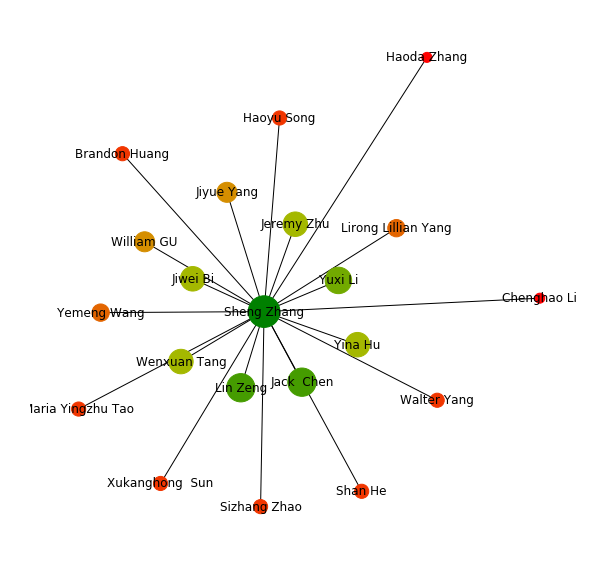

In [270]:
plt.show()

# statistics

In [3]:
db_name = ['harry.db','peiwen.db','helen.db','sheng.db','peiwen_friend.db']
for i,x in enumerate(db_name):
    #print(i,x)
    conn = sqlite3.connect(x)
    df = pd.read_sql_query('select name,birth_date,gender from facebook_users',conn)
    conn.close()
    #age
    df2 = df[pd.notnull(df['birth_date'])]
    df2 = df2[df2.birth_date.str.contains(',')]
    df2['age'] = pd.to_datetime('today').year - pd.DatetimeIndex(df2['birth_date']).year
    print(x, ' age mean ', df2.age.mean())
    print(x, ' age median ', df2.age.median())
    #gender
    size = len(df)
    print(x,' male ',len(df[df['gender']=='Male'])/size)
    print(x,' female ',len(df[df['gender']=='Female'])/size)

harry.db  age mean  33.4
harry.db  age median  31.0
harry.db  male  0.44402985074626866
harry.db  female  0.23880597014925373
peiwen.db  age mean  24.48076923076923
peiwen.db  age median  24.0
peiwen.db  male  0.31343283582089554
peiwen.db  female  0.46766169154228854
helen.db  age mean  26.0
helen.db  age median  26.0
helen.db  male  0.32
helen.db  female  0.64
sheng.db  age mean  24.875
sheng.db  age median  25.0
sheng.db  male  0.4331983805668016
sheng.db  female  0.4493927125506073
peiwen_friend.db  age mean  24.759615384615383
peiwen_friend.db  age median  24.0
peiwen_friend.db  male  0.21019108280254778
peiwen_friend.db  female  0.5477707006369427
